In [62]:
# data wrangling
import pandas as pd 
import numpy as np


# data visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
sns.set_style('darkgrid')

# statistical analysis
from scipy import stats

In [22]:
# read a local csv data

insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [26]:
# inspect data types 

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   int32  
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 68.1+ KB


In [9]:
# rename children column

insurance_df.rename(columns={'children':'no_of_children'}, inplace=True)

In [24]:
# change age data type to float
insurance_df = insurance_df.astype({
    'age':'float',
    'bmi':'int'
})


In [30]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [29]:
# check missing values 

insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
# inspect the descriptive stats of our dataset

insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13270.422265
std,14.049960,6.119875,1.205493,12110.011237
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.000000,0.000000,4740.287150
50%,39.000000,30.000000,1.000000,9382.033000
75%,51.000000,34.000000,2.000000,16639.912515
max,64.000000,53.000000,5.000000,63770.428010


### BAR CHART

<Axes: xlabel='region', ylabel='charges'>

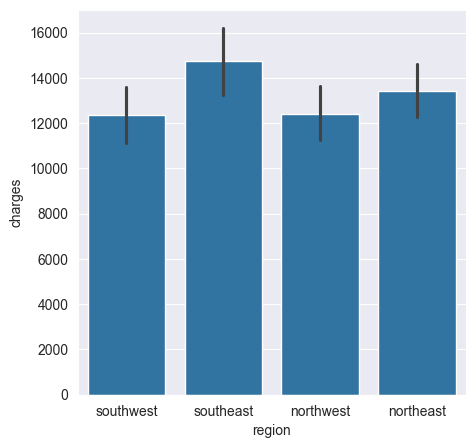

In [ ]:
sns.barplot(data = insurance_df, x = 'region',y = 'charges')

<Axes: xlabel='region', ylabel='charges'>

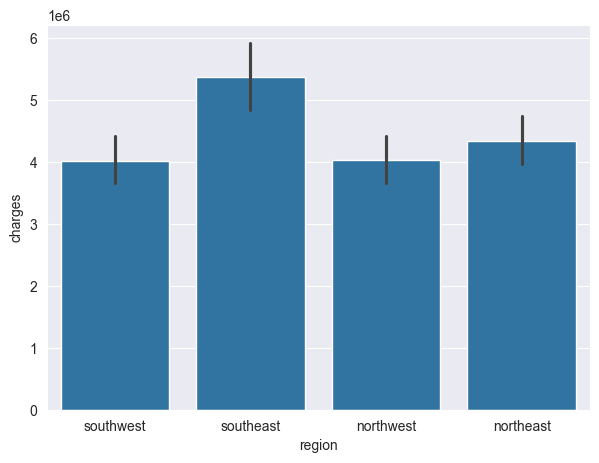

In [42]:
plt.figure(figsize=(7,5)) # control the size of a charge
sns.barplot(data = insurance_df, x = 'region',y = 'charges',estimator='sum')

In [43]:
# bar chart with plotly

px.histogram(data_frame=insurance_df, x = 'region',
             y = 'charges',histfunc='avg')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'histfunc': 'avg',
              'hovertemplate': 'region=%{x}<br>avg of charges=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['southwest', 'southeast', 'southeast', ..., 'southeast', 'southwest',
                          'northwest'], dtype=object),
              'xaxis': 'x',
              'y': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
                          29141.3603]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'region'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'avg of charges'}}}
})

<BarContainer object of 4 artists>

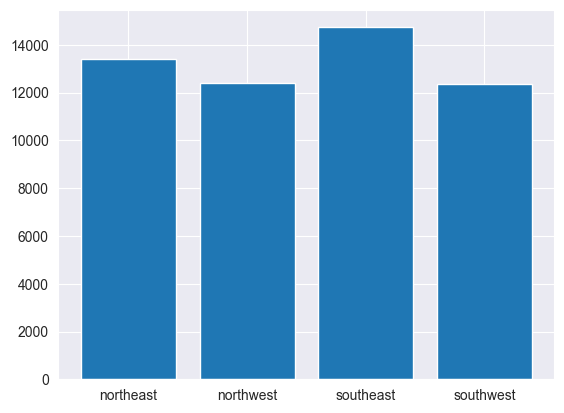

In [56]:
temp_data = insurance_df[['region','charges']].groupby(by='region').mean()
plt.bar(x = temp_data.index, height= temp_data.charges)

In [55]:
temp_data.charges

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [57]:
# pie chart

px.pie(insurance_df, values='charges', names='region', 
       title='Population of European continent')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'region=%{label}<br>charges=%{value}<extra></extra>',
              'labels': array(['southwest', 'southeast', 'southeast', ..., 'southeast', 'southwest',
                               'northwest'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
                               29141.3603])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Population of European continent'}}
})

<Axes: xlabel='bmi', ylabel='charges'>

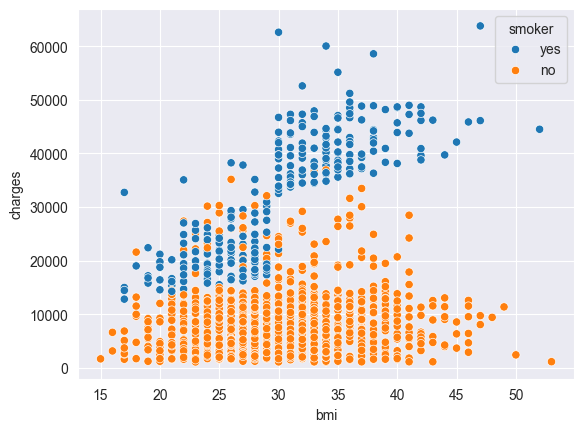

In [60]:
# scatter plot 

sns.scatterplot(data=insurance_df,
                x="bmi", y="charges", hue='smoker')

In [59]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [61]:
px.scatter(data_frame=insurance_df, x = 'bmi',
           y ='charges', color = 'smoker')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'smoker=yes<br>bmi=%{x}<br>charges=%{y}<extra></extra>',
              'legendgroup': 'yes',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'yes',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([27, 26, 42, ..., 26, 40, 29]),
              'xaxis': 'x',
              'y': array([16884.924  , 27808.7251 , 39611.7577 , ..., 28101.33305, 43896.3763 ,
                          29141.3603 ]),
              'yaxis': 'y'},
             {'hovertemplate': 'smoker=no<br>bmi=%{x}<br>charges=%{y}<extra></extra>',
              'legendgroup': 'no',
              'marker': {'color': '#EF553B', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'no',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([33, 33, 22, ..., 31, 36, 25]),
              'xaxis': 'x',
              'y': array([ 1725.5523 ,  4449.462  , 21984.47061, ...,  2205.9808 ,  1629.8335 ,
                           2007.945  ]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'smoker'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'bmi'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'charges'}}}
})